In [758]:
'''
W tym pliku zdefiniowane sa funkcje potrzebne do kryterium Hurwitza
'''
import sympy as sp
import numpy as np
sp.init_printing(use_latex=True)
sp.init_printing(use_unicode=True)
s = sp.Symbol('s', real=True)
k = sp.Symbol('k')


def Hurwitz_sp(Yk):
    '''
    Funkcja sprawdzajaca stabilnosc transmitancji
    INPUT: obiekt sp.Function
    OUTPUT: macierz Hurwitza transmitancji(tex syndax), 
            wektor skladajacy się z wartosci podwyznacznikow macierzy
    '''
    # Zainicjowanie symboli
    Y=Yk
    #Y=sp.parse_expr(str,Yk)
    L, M = sp.fraction(Y)  # podział na licznik i mianownik
    Ywspolczynniki = sp.Poly(M, s)
    Ywspolczynniki = Ywspolczynniki.all_coeffs()
    # Rozpoczynam algorytm kryterium Hurwitza
    Ystopien = len(Ywspolczynniki)-1
    # Tworze wektory potrzebne do stworzenia macierzy Hurwitza
    pTabParz = sp.Matrix([[]])
    pTabNParz = sp.Matrix([[]])
    pm = 0
    pn = 0
    for x in range(Ystopien):
        pm = x*2
        pn = x*2+1
        if pm <= Ystopien:
            pTabParz = pTabParz.col_insert(x, sp.Matrix([Ywspolczynniki[pm]]))
        else:
            pTabParz = pTabParz.col_insert(x, sp.Matrix([0]))
        if pn <= Ystopien:
            pTabNParz = pTabNParz.col_insert(
                x, sp.Matrix([Ywspolczynniki[pn]]))
        else:
            pTabNParz = pTabNParz.col_insert(x, sp.Matrix([0]))
    # Deklaruje macierz Hurwitza jako macierz zer
    macierzHurwitza = sp.zeros(Ystopien, Ystopien)
    # Algorytm zapusijacy macierz Hurwitza
    parzyste = False
    if Ystopien == 0:
        macierzHurwitza = (sp.ones(1, 1))/Y
    else:
        for x in range(Ystopien):
            if(parzyste == False):
                macierzHurwitza.row_del(x)
                macierzHurwitza = macierzHurwitza.row_insert(x, pTabNParz)
                pTabNParz = pTabNParz.col_insert(0, sp.Matrix([0]))
                pTabNParz.col_del(Ystopien)
                parzyste = (not parzyste)
            elif(parzyste == True):
                macierzHurwitza.row_del(x)
                macierzHurwitza = macierzHurwitza.row_insert(x, pTabParz)
                pTabParz = pTabParz.col_insert(0, sp.Matrix([0]))
                pTabParz.col_del(Ystopien)
                parzyste = (not parzyste)
    # Algorytm sprawdzajacy czy wszystkie podwyznaczniki sa dodatnie
    macierzHurwitzaPomocnicza = macierzHurwitza.copy()
    wyznacznikiHurwitza = []
    for x in range(Ystopien):
        wyznacznikiHurwitza.append(macierzHurwitzaPomocnicza.det())
        if macierzHurwitzaPomocnicza.shape[0] > 0:
            macierzHurwitzaPomocnicza.col_del(
                macierzHurwitzaPomocnicza.shape[0]-1)
            macierzHurwitzaPomocnicza.row_del(
                macierzHurwitzaPomocnicza.shape[0]-1)
        # Jesli wszystkie podwyznaczniki sa dodatnie to zmienna stabilnoscHurwitza jest rowna 1,
        # w przeciwnym wypadku jest rowna 0
    return macierzHurwitza, wyznacznikiHurwitza


In [759]:
K_O_LIST = [1/((s+2)*(s+1)*(s-3))]
# Transmitancje regulatora
K_R_LIST = [k]
#Transmitancje sprzężenia
G_LIST = [1]
ILOSC_PRZYKLADOW=len(K_O_LIST)


In [760]:
K_Z_LIST = []
for x in range(1):
    K_Z_LIST.append(sp.simplify((K_O_LIST[x]*K_R_LIST[x])/(1+K_O_LIST[x]*K_R_LIST[x]*G_LIST[x])) )

In [761]:
K_Z_L_LIST = []

K_Z_M_LIST = []
for x in K_Z_LIST:
    K_Z_L_LIST.append(sp.fraction(x)[0])
    K_Z_M_LIST.append(sp.fraction(x)[1])

In [762]:
K_OLS_LIST = []
for x in range(1):
    K_OLS_LIST.append(sp.simplify((K_O_LIST[x]*K_R_LIST[x])))

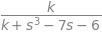

In [763]:
K_Z_LIST[0]

In [764]:
Hurwitz_sp(K_Z_LIST[0])[0]

⎡0  k - 6    0  ⎤
⎢               ⎥
⎢1   -7      0  ⎥
⎢               ⎥
⎣0    0    k - 6⎦

In [765]:
K_E_LIST = []
for x in range(1):
    K_E_LIST.append(sp.simplify(1/(1+K_OLS_LIST[x])))

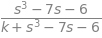

In [766]:
K_E_LIST[0]

In [767]:
t = sp.Symbol('t', real=True)


In [768]:
Y_0=[1,t,t**2,t+1]

In [769]:
p=3

In [770]:
Y_0_s=sp.laplace_transform(Y_0[p], t, s)[0]

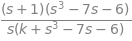

In [771]:
Y_0_s*K_E_LIST[0]*s

In [772]:
sp.limit(s*Y_0_s*K_E_LIST[0],s,0)

In [773]:
print(sp.latex(sp.limit(s*Y_0_s*K_E_LIST[0],s,0)))
print(sp.latex(K_E_LIST[0]))

- \infty \operatorname{sign}{\left(\frac{1}{k - 6} \right)}
\frac{s^{3} - 7 s - 6}{k + s^{3} - 7 s - 6}
